# Basketball  Analysis


In [1]:
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_teams = pd.read_csv('all_records.csv')
playoffs = pd.read_json('nba_spider/playoffs.jl', lines = True)
regular = pd.read_json('nba_spider/regular.jl', lines = True)

In [3]:
playoffs

,year,lg,series,winner,loser,wins_winner,wins_loser
0,2019,NBA,Eastern Conf First Round,Milwaukee Bucks,Detroit Pistons,4,0
1,2019,NBA,Eastern Conf First Round,Toronto Raptors,Orlando Magic,4,1
2,2019,NBA,Eastern Conf First Round,Philadelphia 76ers,Brooklyn Nets,4,1
3,2019,NBA,Eastern Conf First Round,Boston Celtics,Indiana Pacers,4,0
4,2019,NBA,Western Conf First Round,Golden State Warriors,Los Angeles Clippers,4,2
...,...,...,...,...,...,...,...
869,1947,BAA,Quarterfinals,New York Knicks,Cleveland Rebels,2,1
870,1947,BAA,Quarterfinals,Philadelphia Warriors,St. Louis Bombers,2,1
871,1947,BAA,Semifinals,Chicago Stags,Washington Capitols,4,2
872,1947,BAA,Semifinals,Philadelphia Warriors,New York Knicks,2,0


## Historgram of all teams and win frequencies

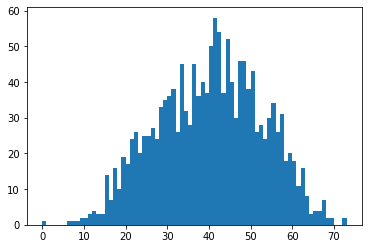

In [4]:
data = all_teams['wins']
plt.hist(all_teams['wins'],bins=np.arange(all_teams['wins'].min(), all_teams['wins'].max()+1))
plt.show()

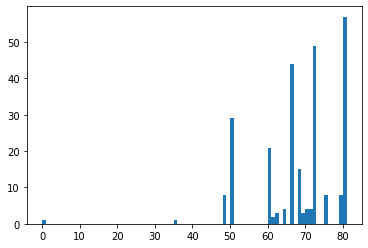

In [5]:
data = (all_teams['wins'] + all_teams['losses'])
plt.hist(round(data,2),bins=np.arange(data.min(), data.max()))
plt.show()


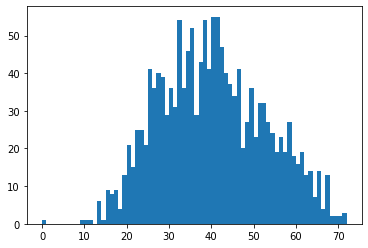

In [6]:
data = (all_teams['losses'])
plt.hist(round(data,2),bins=np.arange(data.min(), data.max()))
plt.show()


In [7]:
regular


,year,league,teams
0,2019,NBA,"{'Milwaukee Bucks': {'win': 60, 'loss': 22, 'r..."
1,2018,NBA,"{'Houston Rockets': {'win': 65, 'loss': 17, 'r..."
2,2017,NBA,"{'Golden State Warriors': {'win': 67, 'loss': ..."
3,2016,NBA,"{'Golden State Warriors': {'win': 73, 'loss': ..."
4,2015,NBA,"{'Golden State Warriors': {'win': 67, 'loss': ..."
...,...,...,...
68,1951,NBA,"{'Minneapolis Lakers': {'win': 44, 'loss': 24,..."
69,1950,NBA,"{'Minneapolis Lakers': {'win': 51, 'loss': 17,..."
70,1949,BAA,"{'Rochester Royals': {'win': 45, 'loss': 15, '..."
71,1948,BAA,"{'St. Louis Bombers': {'win': 29, 'loss': 19, ..."


In [8]:
# d = regular.iloc[0].loc['teams']
# df = pd.DataFrame(d.items())
# for d in regular.iloc[0]
# df = regular.loc[regular.year==2019,'teams']
# regular.year

def full_season(df,y):
    """
    method to convert all regular season data into 
    database of a specific year
    
    input: y - year of interest
        df - dataframe of regular season
    
    returns: DataFrame of teams' records for a specific year
    
    """
    rows = []
    list_teams = df.loc[df.year == y, 'teams'].tolist()[0]
    for d in list_teams:
        row = {}
        row['team'] = d
        row.update(list_teams[d])
        rows.append(row)
    final = pd.DataFrame(rows)
    
    return final
        

In [17]:

full_season(regular,2019)[0:16]

,team,win,loss,rank
0,Milwaukee Bucks,60,22,1
1,Toronto Raptors,58,24,2
2,Golden State Warriors,57,25,3
3,Denver Nuggets,54,28,4
4,Houston Rockets,53,29,5
5,Portland Trail Blazers,53,29,6
6,Philadelphia 76ers,51,31,7
7,Utah Jazz,50,32,8
8,Boston Celtics,49,33,9
9,Oklahoma City Thunder,49,33,10


In [18]:
def simulate_playoffs(df):
    """
    Simulates the NBA playoffs via a 16 team tournaments rather than a 
    traditional East vs. West setting.
    """
    pass